In [2]:
import os
import re
from tqdm import tqdm
import pandas as pd

# ---------- PATHS (explicit) ----------
ROOT_DIR = "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate"
ROOT_DIR_FAILED = "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S"

STEP_DIR = os.path.join(ROOT_DIR, "step")
FAILED_LOG = os.path.join(ROOT_DIR_FAILED, "failed_steps.txt")


def parse_failed_step_log(log_file):
    """
    Extract failed STEP filenames from failed_steps.txt
    """
    filenames = []

    with open(log_file, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            if "[FAIL]" in line and ".step" in line:
                match = re.search(r"\[FAIL\]\s+(.*?\.step)", line)
                if match:
                    filenames.append(match.group(1))

    return list(set(filenames))  # unique


def compute_file_sizes(step_dir, filenames):
    records = []

    for fname in tqdm(filenames, desc="Checking STEP sizes", unit="files"):
        path = os.path.join(step_dir, fname)

        if os.path.exists(path):
            size_bytes = os.path.getsize(path)
            records.append({
                "filename": fname,
                "size_mb": size_bytes / (1024 ** 2),
                "size_gb": size_bytes / (1024 ** 3),
                "exists": True
            })
        else:
            records.append({
                "filename": fname,
                "size_mb": None,
                "size_gb": None,
                "exists": False
            })

    return pd.DataFrame(records)


# ---------- RUN ----------
failed_files = parse_failed_step_log(FAILED_LOG)
print(f"Found {len(failed_files)} failed STEP files in log")

failed_df = compute_file_sizes(STEP_DIR, failed_files)

# Sort by size (largest first, missing last)
df = failed_df.sort_values("size_mb", ascending=False, na_position="last")

display(df)


Found 20 failed STEP files in log


Checking STEP sizes: 100%|██████████| 20/20 [00:00<00:00, 103054.15files/s]


,filename,size_mb,size_gb,exists
4,bfe211c4af09812b91a9b1d5_0d9575d6e291cc281e203...,0.130466,0.000127,True
2,55b374b91a49f68f7ec9edc8_5ad8d849cebbd3be6512e...,0.051974,0.000051,True
11,86699b18449d18fb9a168d5d_f3898f2947ad2d26fe0eb...,0.040642,0.000040,True
9,252fb6dc009ff99afe369481_11e63ebf8dfa3d85e5e21...,0.037234,0.000036,True
12,91ff674b6f804ca36c5f896d_c924a9786f3c6d9bd58cc...,0.031300,0.000031,True
16,1249defe678e8efd442c166e_152882744a0e3f1021fe1...,0.029519,0.000029,True
8,a1d5f41d2efc8902de9945bf_3043a7236bb324f1515bd...,0.025414,0.000025,True
15,142e667bcba183339a5c02c0_726284d646f14d37d6dd0...,0.025267,0.000025,True
14,8b735546bc35eb508b403cd9_cce368975924a53aa37bc...,0.018138,0.000018,True
13,39408f552c001b6f394fc618_b41ccc2c0bb81bfc92f8f...,0.013040,0.000013,True


In [3]:
import os

ROOT_DIR = "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate"
ROOT_DIR_FAILED = "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S"

STEP_DIR = os.path.join(ROOT_DIR, "step")
FAILED_LOG = os.path.join(ROOT_DIR_FAILED, "failed_steps.txt")

print("ROOT_DIR exists:", os.path.exists(ROOT_DIR))
print("STEP_DIR exists:", os.path.exists(STEP_DIR))
print("FAILED_LOG exists:", os.path.exists(FAILED_LOG))

if os.path.exists(STEP_DIR):
    print("STEP files count:", len(os.listdir(STEP_DIR)))


ROOT_DIR exists: True
STEP_DIR exists: True
FAILED_LOG exists: True
STEP files count: 447442


### Analysing Parts/step files

In [4]:
import os
from tqdm import tqdm
import pandas as pd

STEP_ROOT = "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/step"

records = []

# Collect all STEP paths
step_paths = []
for root, _, files in os.walk(STEP_ROOT):
    for f in files:
        if f.lower().endswith((".step", ".stp")):
            step_paths.append(os.path.join(root, f))

print(f"Total STEP files found: {len(step_paths)}")

# Compute sizes
for path in tqdm(step_paths, desc="Scanning STEP files"):
    size_bytes = os.path.getsize(path)
    records.append({
        "filename": os.path.basename(path),
        "path": path,
        "size_mb": size_bytes / (1024 ** 2)
    })

df = pd.DataFrame(records)
display(df.head())


Total STEP files found: 447442


Scanning STEP files: 100%|██████████| 447442/447442 [00:00<00:00, 461697.33it/s]


,filename,path,size_mb
0,7a0ea68b928acc466d3fa91e_c4f504801091edb0f4789...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.009174
1,4b417211dd7396fa56bbb31f_faf3ee7ff50492534c4d5...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.148498
2,595289f0d2ac8d2a917563c4_6cb9432264c454937806b...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.006960
3,6e6ff745cf752aaa35497eb3_037c2bdc853a41d02398c...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.021489
4,7d1761b73b0f57a84a782c29_00a7bc976031bfa93d3d7...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.009149


In [5]:
df["size_mb"].describe()


count    447442.000000
mean          0.157911
std           1.122192
min           0.002395
25%           0.011813
50%           0.027762
75%           0.081636
max         247.271779
Name: size_mb, dtype: float64

In [6]:
bins = [0, 1, 5, 10, 25, 50, 100, 250, 500, float("inf")]
labels = [
    "<1 MB",
    "1–5 MB",
    "5–10 MB",
    "10–25 MB",
    "25–50 MB",
    "50–100 MB",
    "100–250 MB",
    "250–500 MB",
    ">500 MB"
]

df["size_bucket"] = pd.cut(df["size_mb"], bins=bins, labels=labels)
bucket_counts = df["size_bucket"].value_counts().sort_index()

display(bucket_counts)


size_bucket
<1 MB         436226
1–5 MB          9859
5–10 MB          876
10–25 MB         369
25–50 MB          83
50–100 MB         20
100–250 MB         9
250–500 MB         0
>500 MB            0
Name: count, dtype: int64

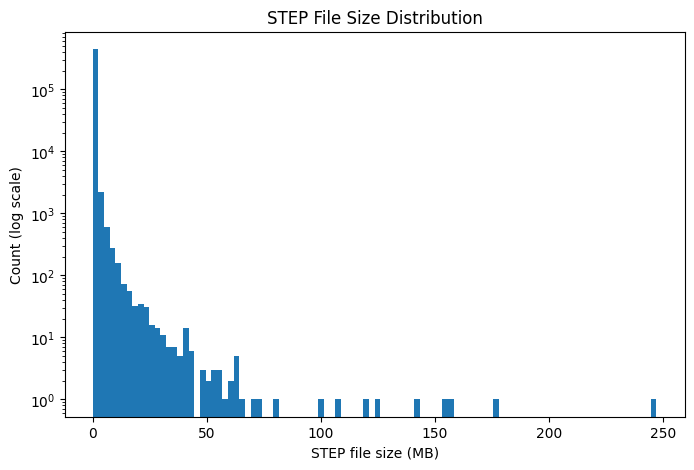

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["size_mb"], bins=100)
plt.yscale("log")
plt.xlabel("STEP file size (MB)")
plt.ylabel("Count (log scale)")
plt.title("STEP File Size Distribution")
plt.show()


In [8]:
large_parts = df[df["size_mb"] > 100]
display(large_parts.sort_values("size_mb", ascending=False).head(20))


,filename,path,size_mb,size_bucket
418445,0ae1b8ca741911b791d04fb6_5c1def68f48526e3b84a6...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,247.271779,100–250 MB
49042,8d7fb91a59fe5c0dbeba1343_2c9ad4fbd63d6fc57fa5f...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,176.221959,100–250 MB
349265,ed4459250296d73980e6e2da_3bde9c12783725348113d...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,156.272797,100–250 MB
7261,de2893a65da5905cff592125_a1b154497d4a602f3ef86...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,155.321744,100–250 MB
352887,9b9b919047cf64328812d5a6_3adbf94f528f4b29f118e...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,142.691563,100–250 MB
332319,70b17cbec09443ffb3cc9191_0dc0a9148ed9e07ba701b...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,123.757686,100–250 MB
423185,67e4a5106b69d7e77716f579_3254413bebb6ec0fc0d21...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,119.064801,100–250 MB
36358,b1e914be8bed096c4c1e1b82_2c9544551f481cfe5862f...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,107.642903,100–250 MB
330087,112ec196b5d904a517392005_97ad34d93012508e7b30c...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,100.847747,100–250 MB


In [9]:
tiny_parts = df[df["size_mb"] < 0.5]
display(tiny_parts.head(20))


,filename,path,size_mb,size_bucket
0,7a0ea68b928acc466d3fa91e_c4f504801091edb0f4789...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.009174,<1 MB
1,4b417211dd7396fa56bbb31f_faf3ee7ff50492534c4d5...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.148498,<1 MB
2,595289f0d2ac8d2a917563c4_6cb9432264c454937806b...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.006960,<1 MB
3,6e6ff745cf752aaa35497eb3_037c2bdc853a41d02398c...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.021489,<1 MB
4,7d1761b73b0f57a84a782c29_00a7bc976031bfa93d3d7...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.009149,<1 MB
5,42999acc7d8b00bc7317ab7a_27baa376cf1a870bf17e4...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.014235,<1 MB
6,1649b9f28044827b169bceec_1a9b1a0c75ed22354aabe...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.076104,<1 MB
7,e9744af50e2006401e1d6abd_818a658de1b6c53d7d760...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.021638,<1 MB
8,ca5175fbb71d1d4de8c3d87d_b550047f89b1c8840f0f2...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.111669,<1 MB
9,d1e0c3d45ff2e638f96f3fb0_612b44b68d86fcd3557fa...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,0.280958,<1 MB


### Statistics of failed files

In [10]:
failed_df["size_mb"].describe()


count    20.000000
mean      0.022300
std       0.029705
min       0.002395
25%       0.002408
50%       0.012568
75%       0.029964
max       0.130466
Name: size_mb, dtype: float64

In [11]:
bins = [0, 1, 5, 10, 25, 50, 100, 250, float("inf")]
labels = [
    "<1 MB",
    "1–5 MB",
    "5–10 MB",
    "10–25 MB",
    "25–50 MB",
    "50–100 MB",
    "100–250 MB",
    ">250 MB"
]

failed_df["size_bucket"] = pd.cut(
    failed_df["size_mb"], bins=bins, labels=labels
)

bucket_counts = failed_df["size_bucket"].value_counts().sort_index()
display(bucket_counts)


size_bucket
<1 MB         20
1–5 MB         0
5–10 MB        0
10–25 MB       0
25–50 MB       0
50–100 MB      0
100–250 MB     0
>250 MB        0
Name: count, dtype: int64

# Analysing new way

### Scan Automate/step and compute sizes (with tqdm)

In [12]:
import os
from tqdm import tqdm
import pandas as pd

ROOT = "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate"
STEP_ROOT = os.path.join(ROOT, "step")

# collect step files recursively (handles 00001/00002/... structure)
step_paths = []
for r, _, files in os.walk(STEP_ROOT):
    for f in files:
        if f.lower().endswith((".step", ".stp")):
            step_paths.append(os.path.join(r, f))

print("STEP_ROOT:", STEP_ROOT)
print("Total STEP files found:", len(step_paths))

rows = []
for p in tqdm(step_paths, desc="Reading STEP sizes", unit="files"):
    try:
        sz = os.path.getsize(p)
    except OSError:
        sz = None
    rows.append({
        "filename": os.path.basename(p),
        "path": p,
        "size_mb": None if sz is None else sz / (1024**2),
    })

step_df = pd.DataFrame(rows).drop_duplicates(subset=["filename"])
step_df = step_df.sort_values("size_mb", ascending=False, na_position="last")

display(step_df.head(10))
print("Unique STEP filenames:", len(step_df))


STEP_ROOT: /media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/step
Total STEP files found: 447442


Reading STEP sizes: 100%|██████████| 447442/447442 [00:00<00:00, 472361.01files/s]


,filename,path,size_mb
418445,0ae1b8ca741911b791d04fb6_5c1def68f48526e3b84a6...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,247.271779
49042,8d7fb91a59fe5c0dbeba1343_2c9ad4fbd63d6fc57fa5f...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,176.221959
349265,ed4459250296d73980e6e2da_3bde9c12783725348113d...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,156.272797
7261,de2893a65da5905cff592125_a1b154497d4a602f3ef86...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,155.321744
352887,9b9b919047cf64328812d5a6_3adbf94f528f4b29f118e...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,142.691563
332319,70b17cbec09443ffb3cc9191_0dc0a9148ed9e07ba701b...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,123.757686
423185,67e4a5106b69d7e77716f579_3254413bebb6ec0fc0d21...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,119.064801
36358,b1e914be8bed096c4c1e1b82_2c9544551f481cfe5862f...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,107.642903
330087,112ec196b5d904a517392005_97ad34d93012508e7b30c...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,100.847747
291848,1d9415285bac2bee0265830a_96337b584075c00deffb5...,/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512...,80.814586


Unique STEP filenames: 447442


### Load parts.parquet and extract part identifiers

In [13]:
import pandas as pd
import os

PARTS_PARQUET = os.path.join(ROOT, "parts.parquet")
print("parts.parquet exists:", os.path.exists(PARTS_PARQUET))

parts_df = pd.read_parquet(PARTS_PARQUET)
print("parts.parquet shape:", parts_df.shape)
display(parts_df.head())

print("\nColumns:", list(parts_df.columns))


parts.parquet exists: True
parts.parquet shape: (451967, 85)


,part_id,readable,n_parts,n_bodies,has_corrupt_state,has_invalid_state,has_missing_geometry,error_checking_topology,error_finding_bounding_box,error_finding_na_box,...,m_of_i_6,m_of_i_7,m_of_i_8,mp_periphery,has_step,uniqueid,has_step_rep,rep_part_id,is_rep,has_error
0,0af5155a5324364502ee1c94_ec8be450d8d822ed72df6...,True,1,1,False,False,False,False,False,False,...,-8.926234e-27,1.283246e-27,3.945257e-09,0.003001,True,6513022102410161000000000002300000100-0.1016-0...,True,0af5155a5324364502ee1c94_ec8be450d8d822ed72df6...,True,False
1,7d1157b01fc5af538ceda6f9_9970d6ab3e2ccd8224336...,True,1,1,False,False,False,False,False,False,...,-3.313693e-10,-1.106098e-10,2.258535e-03,2.035163,True,1340288734252528264288132120000000000404012000...,True,7d1157b01fc5af538ceda6f9_9970d6ab3e2ccd8224336...,True,False
2,4e76800b9022e6de8a212dae_6081fa69cce7afcea730b...,True,1,1,False,False,False,False,False,False,...,6.654171e-10,-5.074223e-10,7.689682e-08,0.023206,True,13226322204924348520020010224140040700-0.37602...,True,4e76800b9022e6de8a212dae_6081fa69cce7afcea730b...,True,False
4,a3a2ae26953278ca2600ff88_6d93063f08a81c3f594b8...,True,1,1,False,False,False,False,False,False,...,-3.780292e-14,3.895988e-13,2.320688e-10,0.003052,True,2572545122399105642968316722903110160036577927...,True,a3a2ae26953278ca2600ff88_6d93063f08a81c3f594b8...,True,False
6,cf36f6b1f2bbfd90031f9f96_5a27b5b05d4776e581f83...,True,1,1,False,False,False,False,False,False,...,-3.556691e-11,3.551904e-12,1.503794e-09,0.004676,True,23848422399246562251010202062016004001600-0.16...,True,cf36f6b1f2bbfd90031f9f96_5a27b5b05d4776e581f83...,True,False



Columns: ['part_id', 'readable', 'n_parts', 'n_bodies', 'has_corrupt_state', 'has_invalid_state', 'has_missing_geometry', 'error_checking_topology', 'error_finding_bounding_box', 'error_finding_na_box', 'error_computing_mass_properties', 'n_faults', 'n_faces_no_geo', 'n_edges_no_geo', 'n_verts_no_geo', 'n_topols', 'n_relations', 'n_regions', 'n_shells', 'n_faces', 'n_edges', 'n_loops', 'n_vertices', 'n_plane', 'n_cyl', 'n_cone', 'n_sphere', 'n_torus', 'n_bsurf', 'n_offset', 'n_fsurf', 'n_swept', 'n_spun', 'n_blendsf', 'n_line', 'n_circle', 'n_ellipse', 'n_bcurve', 'n_icurve', 'n_fcurve', 'n_spcurve', 'n_trcurve', 'n_cpcurve', 'bb_0', 'bb_1', 'bb_2', 'bb_3', 'bb_4', 'bb_5', 'nabb_axis_0', 'nabb_axis_1', 'nabb_axis_2', 'nabb_loc_0', 'nabb_loc_1', 'nabb_loc_2', 'nabb_ref_0', 'nabb_ref_1', 'nabb_ref_2', 'nabb_box_0', 'nabb_box_1', 'nabb_box_2', 'nabb_box_3', 'nabb_box_4', 'nabb_box_5', 'mp_amount', 'mp_mass', 'c_of_g_0', 'c_of_g_1', 'c_of_g_2', 'm_of_i_0', 'm_of_i_1', 'm_of_i_2', 'm_of_i_

### Identify how STEP filenames map to parts

In [14]:
parts_df["step_filename"] = parts_df["part_id"].astype(str) + ".step"

### Merge STEP sizes with part metadata (KEY STEP)

In [15]:
merged = parts_df.merge(
    step_df,
    left_on="step_filename",
    right_on="filename",
    how="left"
)

print("Merged shape:", merged.shape)
display(merged[["uniqueid", "has_step", "size_mb"]].head())


Merged shape: (451967, 89)


,uniqueid,has_step,size_mb
0,6513022102410161000000000002300000100-0.1016-0...,True,0.016102
1,1340288734252528264288132120000000000404012000...,True,0.353796
2,13226322204924348520020010224140040700-0.37602...,True,0.736475
3,2572545122399105642968316722903110160036577927...,True,1.131747
4,23848422399246562251010202062016004001600-0.16...,True,0.337691


### Quick sanity check

In [16]:
display(
    merged[["part_id", "has_step", "size_mb"]]
    .head(10)
)


,part_id,has_step,size_mb
0,0af5155a5324364502ee1c94_ec8be450d8d822ed72df6...,True,0.016102
1,7d1157b01fc5af538ceda6f9_9970d6ab3e2ccd8224336...,True,0.353796
2,4e76800b9022e6de8a212dae_6081fa69cce7afcea730b...,True,0.736475
3,a3a2ae26953278ca2600ff88_6d93063f08a81c3f594b8...,True,1.131747
4,cf36f6b1f2bbfd90031f9f96_5a27b5b05d4776e581f83...,True,0.337691
5,58ae69f0d42cfa104a83d99a_ca70044bff261f50552e8...,True,0.066811
6,68c7a4a79f8fcd7d7b3ecc65_56e1b3e113744bdba1cf9...,True,0.292794
7,5b528dbf563dea8163f252f3_927f84b7aba2e16b2f75f...,True,0.276311
8,5fb1fdd3f682973c1b34df9e_a657ff391af8e1002c3ba...,True,0.169430
9,f43fe3a2be98a782c5e54b68_dab3d6f9e030740ad4959...,True,0.188212


### Analyze STEP file sizes

In [17]:
merged["size_mb"].describe()


count    447442.000000
mean          0.157911
std           1.122192
min           0.002395
25%           0.011813
50%           0.027762
75%           0.081636
max         247.271779
Name: size_mb, dtype: float64

### Bucket parts by STEP size (recommended)

In [18]:
bins = [0, 1, 5, 10, 25, 50, 100, 250, float("inf")]
labels = [
    "<1 MB", "1–5 MB", "5–10 MB", "10–25 MB",
    "25–50 MB", "50–100 MB", "100–250 MB", ">250 MB"
]

merged["size_bucket"] = pd.cut(
    merged["size_mb"], bins=bins, labels=labels
)

display(
    merged["size_bucket"]
    .value_counts()
    .sort_index()
)


size_bucket
<1 MB         436226
1–5 MB          9859
5–10 MB          876
10–25 MB         369
25–50 MB          83
50–100 MB         20
100–250 MB         9
>250 MB            0
Name: count, dtype: int64

### Size vs failure / corruption

#### Error rate vs size

In [19]:
display(
    merged.groupby("size_bucket")["has_error"]
          .mean()
          .rename("error_rate")
)


/tmp/ipykernel_71561/3332826437.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby("size_bucket")["has_error"]


size_bucket
<1 MB         0.000802
1–5 MB         0.02059
5–10 MB       0.054795
10–25 MB      0.051491
25–50 MB      0.108434
50–100 MB         0.15
100–250 MB    0.222222
>250 MB           <NA>
Name: error_rate, dtype: Float64

#### Corrupt / invalid geometry vs size

In [20]:
display(
    merged.groupby("size_bucket")[[
        "has_corrupt_state",
        "has_invalid_state",
        "has_missing_geometry"
    ]].mean()
)


/tmp/ipykernel_71561/1493003604.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby("size_bucket")[[


,has_corrupt_state,has_invalid_state,has_missing_geometry
size_bucket,,,
<1 MB,0.000007,0.000158,0.000007
1–5 MB,0.000507,0.004057,0.000406
5–10 MB,0.001142,0.006849,0.002283
10–25 MB,0.0,0.00542,0.00542
25–50 MB,0.0,0.0,0.0
50–100 MB,0.0,0.0,0.0
100–250 MB,0.0,0.0,0.0
>250 MB,<NA>,<NA>,<NA>


### Size vs topology complexity (very important)

In [21]:
display(
    merged[["size_mb", "n_faces", "n_edges", "n_shells"]]
    .dropna()
    .corr()
)


,size_mb,n_faces,n_edges,n_shells
size_mb,1.000000,0.639449,0.654427,0.124979
n_faces,0.639449,1.000000,0.970101,0.163541
n_edges,0.654427,0.970101,1.000000,0.180532
n_shells,0.124979,0.163541,0.180532,1.000000


### Visual confirmation

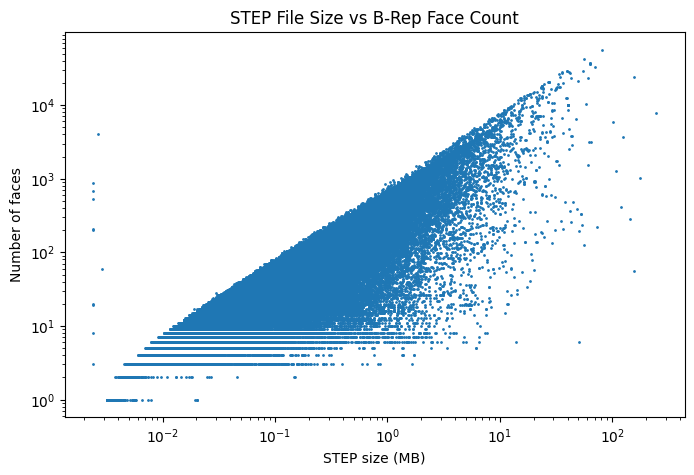

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(merged["size_mb"], merged["n_faces"], s=1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("STEP size (MB)")
plt.ylabel("Number of faces")
plt.title("STEP File Size vs B-Rep Face Count")
plt.show()


### Dataset Health Check

In [23]:
# --- DEFINING THE SAFETY FILTER (Inspection Only) ---

# 1. Geometry Filter (Must be valid)
valid_geo = (
    (~merged["has_corrupt_state"]) & 
    (~merged["has_invalid_state"]) & 
    (~merged["has_missing_geometry"])
)

# 2. Complexity Filter (Keep it trainable)
# 25MB covers 99.8% of your data but removes the dangerous outliers.
manageable_size = merged["size_mb"] < 25.0 

# 3. Create the Mask
merged["is_trainable"] = valid_geo & manageable_size

# --- STATS ---
total = len(merged)
trainable = merged['is_trainable'].sum()
discarded = total - trainable

print(f"Total parts:      {total}")
print(f"Trainable parts:  {trainable}  ({(trainable/total)*100:.2f}%)")
print(f"Discarded:        {discarded}  ({(discarded/total)*100:.2f}%)")

# Optional: Peek at what you are discarding to feel good about it
print("\n--- Why were parts discarded? ---")
print(f"Corrupt/Invalid Geometry: {(~valid_geo).sum()}")
print(f"Too Large (>25MB):        {(~manageable_size).sum()}")

# NOT saving to parquet yet.

Total parts:      451967
Trainable parts:  447193  (98.94%)
Discarded:        4774  (1.06%)

--- Why were parts discarded? ---
Corrupt/Invalid Geometry: 141
Too Large (>25MB):        4637


### Saving "Gold Standard" List

In [24]:
# 1. Rename 'path' to 'absolute_path' so it matches the graph script expectations
merged.rename(columns={"path": "absolute_path"}, inplace=True)

# 2. Now filter and select
final_list = merged[merged["is_trainable"]].copy()
final_list = final_list[["part_id", "absolute_path", "size_mb"]]

# 3. Save to your project folder
final_list.to_parquet("project/parts_trainable.parquet")

print("✅ Saved 'parts_trainable.parquet' with correct 'absolute_path' column.")

✅ Saved 'parts_trainable.parquet' with correct 'absolute_path' column.
